# pytorch computer vision

## computer vision libaries in pytorch

torchvision >> base domain library for PyTorch computer vision

torchvision.datasets  >> get datasets and data loading functions for computer vision here

torchvision.models  >> get pretrained computer vision models that you can leverage for your own problems

torchvision.transforms  >> functions for manipulating your vision data (images) to be suitable for use with an ML model

`torch.utils.data.Dataset` -Base dataset class for PyTorch.

`torch.utils.data.DataLoader` -Creates a Python iterable over a dataset


In [1]:
# Import PyTorch
import torch 
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

#Check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu129
0.23.0+cu129


## Getting a dataset
The dataset we'll be using is FashionMNIST from torchvision.datasets 

In [2]:
#Setup training data
from torchvision import datasets
train_data =datasets.FashionMNIST(
        root="data", # where to download data to?
        train=True, #do we want the training dataset?
        download=True, # do we want to download yes/no?
        transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
        target_transform=None # how do we want to transform the labels/targets?
        )
test_data=datasets.FashionMNIST(
                                root="data",
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# Check the shape of our data looks
# is object contains 60000 tuples 
#print(f"Image shape: {train_data[0].shape} -> [size,color_channels, height, width]")

In [5]:
train_data[0]
# train_data is like array of tuples ->[(tensor,int)]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# see the first training example 
image,lable=train_data[0]
image,lable

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print (f"Image label: {class_names[lable]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

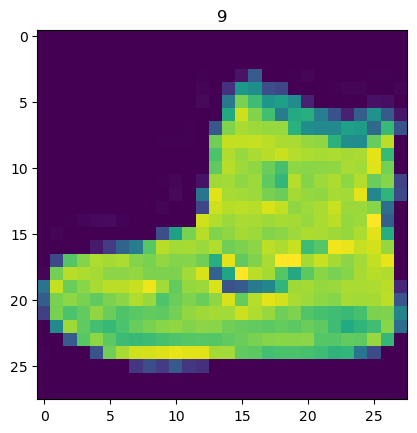

In [11]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

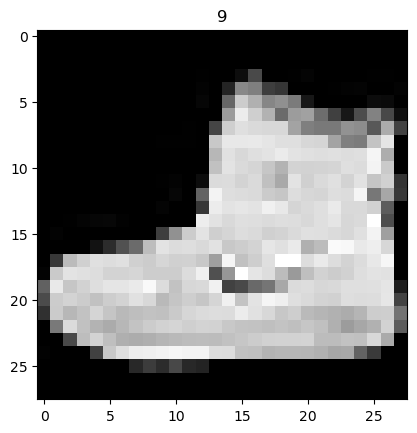

In [12]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze(),cmap='grey')
plt.title(label)

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

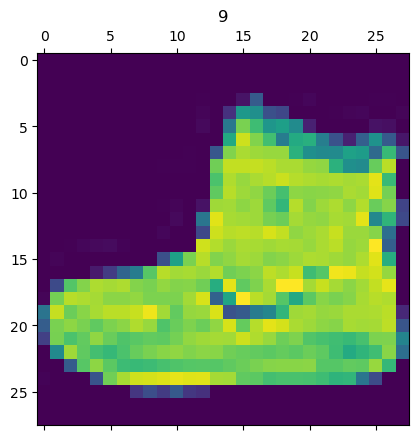

In [13]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image Shape: {image.shape}")
plt.matshow(image.squeeze())
plt.title(label)

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

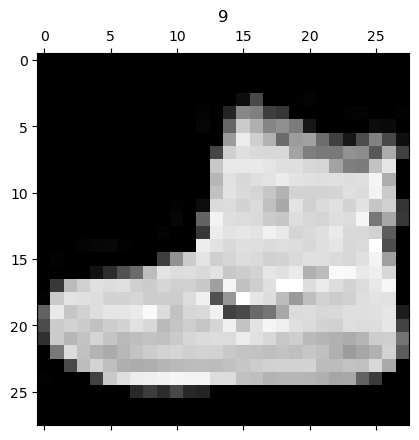

In [14]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image Shape: {image.shape}")
plt.matshow(image.squeeze())
plt.gray()
plt.title(label)

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

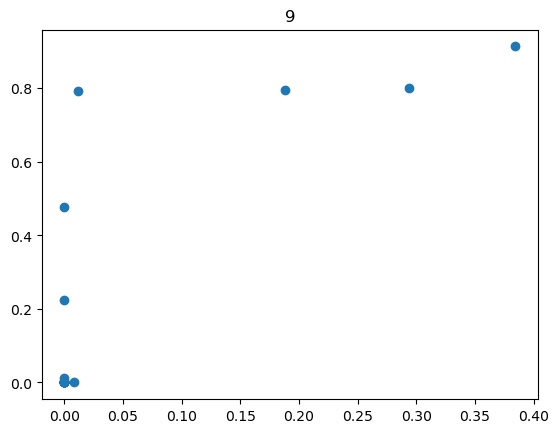

In [15]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image Shape: {image.shape}")
plt.scatter(image.squeeze()[:,0],image.squeeze()[:,1])
plt.title(label)

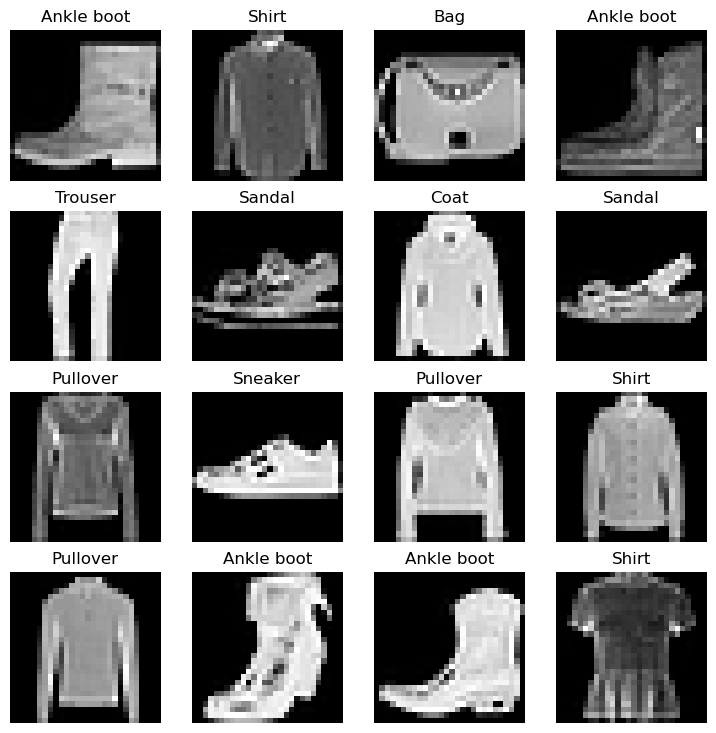

In [16]:
#Plot more images.
torch.manual_seed(42)
fig =plt.figure(figsize=(9, 9))
rows, cols= 4, 4
for i in range(1, rows*cols+1):
    random_idx=torch.randint(0, len(train_data), size=[1]).item()
    img, label=train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [17]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##  Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [18]:
from torch.utils.data import DataLoader
#Setup the batch size hyperparameter
BATCH_SIZE = 32
#Turn datasets into iterables (batches)
train_dataloader=DataLoader (
                            dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader (dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1e3e3c423c0>,
 <torch.utils.data.dataloader.DataLoader at 0x1e3e533e490>)

In [19]:
# Get one batch from the dataloader
# Unpack the batch
X, y = next(iter(train_dataloader))
print("Shape of X:", X.shape)
print("Shape of X[0]:", X[0].shape)
print("Shape of y:", y.shape)
print("Example labels:", y[:10])

Shape of X: torch.Size([32, 1, 28, 28])
Shape of X[0]: torch.Size([1, 28, 28])
Shape of y: torch.Size([32])
Example labels: tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5])


In [20]:
#another way to unpack
for (x, y) in train_dataloader:
    print(x,y)
    break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [21]:
#Let's check out what what we've created
print(f"DataLoaders: (train_dataloader, test_dataloader)")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print (f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (train_dataloader, test_dataloader)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [22]:
#Check out what's inside the training dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


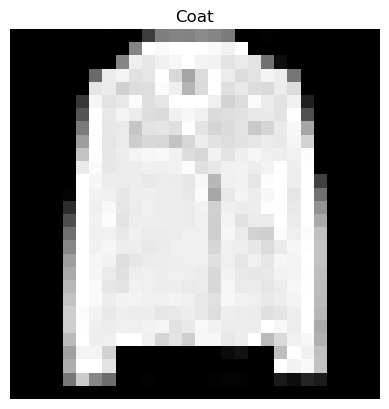

In [23]:
#Show a sample
#torch.manual_seed(42)
random_idx =torch.randint(0, len(train_features_batch), size=[1]).item()
img, label =train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# creatiing base model

In [24]:
# create flattrn layer
flatten_model=nn.Flatten()

# get a single sample
x=train_features_batch[0]

# flatten sample
output=flatten_model(x)

# lets print and see!
print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [25]:
#output[0][:100]
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [26]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [27]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack= nn.Sequential(
                nn.Flatten(),
                nn. Linear(in_features=input_shape,
                out_features=hidden_units),
                nn.Linear(in_features=hidden_units,
                out_features=output_shape))
    
    def forward(self,x):
       return self.layer_stack(x)

In [28]:
torch.manual_seed(42)                                 
model_0=FashionMNISTModelV0(input_shape=784,    #28*28
                            hidden_units=10,
                           output_shape=10).to("cpu")
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [29]:
# create dummy input
#dummy_x = torch.rand([1, 1,1, 28, 28])
dummy_x = torch.rand([1,1, 28, 28])
#dummy_x = torch.rand([1,, 28, 28])

#no mater of shape becouse it will be flatten

# wrong: this doesn't flatten
dummyyyy = nn.Flatten(dummy_x)

# correct: flatten properly
dummyyyy = nn.Flatten()(dummy_x)

# print results
print(dummy_x[0])
print(dummyyyy[0])
print(dummy_x.shape)

# model output shape (if model_0 exists)
print(model_0(dummy_x).shape)

tensor([[[0.0851, 0.8142, 0.2461, 0.7762, 0.4256, 0.2940, 0.8762, 0.4034,
          0.2302, 0.4234, 0.1820, 0.0186, 0.4124, 0.4718, 0.2150, 0.9432,
          0.3883, 0.3730, 0.8962, 0.5556, 0.3824, 0.6150, 0.0482, 0.9916,
          0.6319, 0.6758, 0.1312, 0.8823],
         [0.0891, 0.3263, 0.1794, 0.2475, 0.6067, 0.0041, 0.0105, 0.6142,
          0.6648, 0.5072, 0.3100, 0.3601, 0.4309, 0.3986, 0.1907, 0.8764,
          0.6012, 0.1655, 0.3984, 0.1382, 0.2079, 0.8798, 0.6526, 0.7190,
          0.4351, 0.3752, 0.5646, 0.1448],
         [0.0025, 0.8515, 0.5102, 0.8033, 0.8762, 0.7187, 0.3291, 0.4083,
          0.4739, 0.5299, 0.5194, 0.1091, 0.2251, 0.8644, 0.5160, 0.2733,
          0.8380, 0.3516, 0.2966, 0.8494, 0.1055, 0.2605, 0.8784, 0.4511,
          0.2938, 0.9149, 0.5761, 0.0302],
         [0.1303, 0.3732, 0.4726, 0.1235, 0.3116, 0.6690, 0.0337, 0.0314,
          0.6300, 0.5954, 0.0171, 0.0348, 0.9154, 0.9990, 0.2815, 0.9981,
          0.8453, 0.9444, 0.2848, 0.3776, 0.7948, 0.6855,

###  Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer torch.optim.SGD()` (stochastic gradient descent) 
* Evaluation metric -since we're working on a classification problem, let's use accruacy as our evaluation metric
  

In [30]:
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [31]:
# set loss and opptimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

###  Creating a function to time our experiments
Machine learning is very experimental.
Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 

In [32]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
    # time differernce btw start and end
    total_time=end-start
    print(f"train time on {device}: {total_time:.3f} seconds")
    return total_time

In [33]:
start=timer()
#code
end=timer()
print_train_time(start, end, device="cpu")

train time on cpu: 0.000 seconds


3.680000372696668e-05

### Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun). 

In [34]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set epochs
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    ## training
    train_loss = 0
    # add a loop to loop through the training batches
    for batch, (x, y) in enumerate(train_dataloader):
        model_0.train()
        # forward pass
        y_pred = model_0(x)

        # calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # optimze zerograd
        optimizer.zero_grad()

        # loss backword
        loss.backward()

        # optimizer setp
        optimizer.step()

        # print some thing whats hapening
        if batch % 400 == 0:
            print(f"looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.")

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred=model_0(X_test)
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1))
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    # print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 1106.9799 | test loss: 0.5095, test acc: 82.0387
Epoch: 1
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 893.1224 | test loss: 0.4799, test acc: 83.1969
Epoch: 2
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 853.1874 | test loss: 0.4766, test acc: 83.4265
train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0

In [35]:
time0=total_train_time_model_0
time0

39.93477870000061

In [36]:
tqdm([0])

  0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
for i in tqdm([0,2,6,7]):
    print(i)

  0%|          | 0/4 [00:00<?, ?it/s]

0
2
6
7


In [38]:
str(next(model_0.parameters()))

'Parameter containing:\ntensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],\n        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],\n        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],\n        ...,\n        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],\n        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],\n        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],\n       requires_grad=True)'

# make predicyions and get model results

In [39]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device,
              accuracy_fn):

    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for x,y in tqdm(data_loader):
            x,y=x.to(device),y.to(device)
            # make predicition
            y_pred=model(x)

            loss +=loss_fn(y_pred,y)
            acc +=accuracy_fn(y,y_pred.argmax(dim=1))

        loss /=len(data_loader)
        acc/=len(data_loader)
    return{"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc }

In [40]:
model_0_results=eval_model(model=model_0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          device="cpu",
                          accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# device agnostic code 

In [41]:
!nvidia-smi

Sun Oct 19 16:03:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.08                 Driver Version: 581.08         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P3             14W /   35W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [42]:
torch.cuda.is_available()

True

In [43]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# building a model with non-linearity

In [44]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack= nn.Sequential(
                nn.Flatten(),
                nn. Linear(in_features=input_shape,out_features= hidden_units),
                nn.ReLU(),
                nn.Linear(in_features=hidden_units,out_features=output_shape),
                nn.ReLU() 
                )
        
    
    def forward(self,x):
       return self.layer_stack(x)

In [45]:
next(model_0.parameters()).device

device(type='cpu')

In [46]:
torch.manual_seed(42)                                 
model_1=FashionMNISTModelV1(input_shape=784,    #28*28
                            hidden_units=10,
                           output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [47]:
model_1_results=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          device=device,
                          accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.3021068572998047,
 'model_acc': 10.75279552715655}

In [48]:
# set loss and opptimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# functionizing training and testing loop

In [49]:
def train_and_test(model: torch.nn.Module,
              train_dataloader:torch.utils.data.DataLoader,
              test_dataloader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim,
              epochs:int,
              accuracy_fn,
              device: torch.device=device):
    # import tqdm for progress bar
    from tqdm.auto import tqdm
    
    # set the seed and start the timer
    torch.manual_seed(42)
    train_time_start_on_cpu = timer()
    
    # create training and testing loop
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n----------")
        ## training
        train_loss,train_acc = 0,0
        # add a loop to loop through the training batches
        for batch, (x, y) in enumerate(train_dataloader):
            x,y=x.to(device),y.to(device)
            model.train()
            # forward pass
            y_pred = model(x)
    
            # calculate the loss
            loss = loss_fn(y_pred, y)
            train_acc+=accuracy_fn(y,y_pred.argmax(dim=1))
            train_loss += loss
    
            # optimze zerograd
            optimizer.zero_grad()
    
            # loss backword
            loss.backward()
    
            # optimizer setp
            optimizer.step()
    
            # print some thing whats hapening
            if batch % 400 == 0:
                print(f"looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.")
        train_loss/=len(train_dataloader)
        train_acc/=len(train_dataloader)
        
        ### Testing
        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                # 1. Forward pass
                X_test, y_test=X_test.to(device), y_test.to(device)
                test_pred=model(X_test)
                # 2. Calculate loss (accumulatively)
                test_loss += loss_fn(test_pred, y_test)
                # 3. Calculate accuracy
                test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1))
            # Calculate the test loss average per batch
            test_loss /= len(test_dataloader)
            # Calculate the test acc average per batch
            test_acc /= len(test_dataloader)
        # print out what's happening
        print(f"\nTrain loss: {train_loss:.4f}, Train acc: {test_acc:.4f} | test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")
    
    # calculate training time
    train_time_end_on_cpu = timer()
    total_train_time_model = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model.parameters())))
    return total_train_time_model

In [50]:
time1=train_and_test(model=model_1,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              epochs=3,
              accuracy_fn=accuracy_fn,
              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 1.0920, Train acc: 64.9960 | test loss: 0.9564, test acc: 64.9960
Epoch: 1
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.7810, Train acc: 73.9117 | test loss: 0.7223, test acc: 73.9117
Epoch: 2
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.6703, Train acc: 75.0200 | test loss: 0.6850, test acc: 75.0200
train time on Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0087,  ..., -0.0171,  0.0077,  0.0135],
        [-0.0190, -0.0359,  0.0193,  ...,  0.0192,  0.0259,  0.0185],
        [-0.0009,  0.0020,  0.0007,  ...,  0.0185, -0.0024,  0.0076],
    

In [51]:
time1

57.09664010000415

In [52]:
model_1_results=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          device=device,
                          accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

# Building CNN model

In [53]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int,output_shape: int):
        super().__init__()
        self.conv_block_1= nn.Sequential(
        #Create a conv layer https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), 
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= 490,# 10 * 7 * 7 = 49 (from error or 'shape of conv_block_2(last conv layer)*hidden layers'),
                  out_features=output_shape))
        
    def forward(self, x):
        #print(x.shape)
        x=self.conv_block_1(x)
        #print(x.shape)
        x= self.conv_block_2(x)
        #print(x.shape) 
        x= self.classifier(x)
        #print(x.shape)
        return x
        

In [54]:
image.shape

torch.Size([1, 28, 28])

In [55]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                           hidden_units=10,
                           output_shape=len(class_names)).to(device)

In [56]:
torch.manual_seed(42)
# Create a batch of images
images=torch.randn(size=(32, 3, 64, 64))
test_image = images [0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

### testing conv layer

In [57]:
#Create a sinlge conv2d layer
conv_layer =nn.Conv2d(in_channels=3,
            out_channels=10,
            kernel_size=(3,3),
            stride=2,
            padding=0)
#Pass the data through the convolutional layer
conv_output =conv_layer(test_image)
conv_output.shape,conv_output

(torch.Size([10, 31, 31]),
 tensor([[[-0.2878, -0.0563, -0.4164,  ..., -0.2366,  0.9393,  0.6622],
          [-0.0413,  0.3742, -0.0149,  ..., -0.0542, -0.5646,  0.1492],
          [ 0.1682,  0.8529, -0.5321,  ..., -0.8009, -0.5263, -0.4045],
          ...,
          [ 0.1249, -0.9484,  0.4897,  ...,  0.0830, -0.0567, -0.5420],
          [ 0.9069, -0.0487,  0.6353,  ...,  0.6214, -0.3950,  0.2709],
          [-0.1451,  0.6178, -0.5367,  ..., -0.1336, -0.0419, -0.3663]],
 
         [[-1.0853,  0.1335,  0.6634,  ..., -0.6360, -0.1891, -1.7643],
          [ 0.6493, -0.4999,  0.5494,  ..., -0.6399, -0.4049,  0.2461],
          [ 0.0204,  0.4379,  0.0573,  ...,  0.5002, -0.0679, -0.0265],
          ...,
          [ 0.9344, -0.3626, -0.3586,  ...,  0.0818, -0.0203,  0.0062],
          [-0.4746, -0.3852, -0.0734,  ..., -0.1852,  0.5992, -0.1908],
          [-0.5982, -0.7271,  0.3145,  ..., -0.1060, -0.5727, -0.8989]],
 
         [[ 0.0396, -0.9651, -0.8492,  ...,  0.4463,  0.7838, -0.2932],
 

### test maxpool layer

In [58]:
test_image.shape

torch.Size([3, 64, 64])

In [59]:
#Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")

#Create a sample nn.MaxPool2d layer
max_pool_layer= nn.MaxPool2d(kernel_size=2)

#Pass data through just the conv layer
test_image_through_conv =conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print (f"Shape after going through conv layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 31, 31])
Shape after going through conv layer() and max_pool_layer(): torch.Size([10, 15, 15])


In [60]:
torch.manual_seed(42)
#Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
#Create a max pool layer
max_pool_layer= nn.MaxPool2d(kernel_size=2)
# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [61]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                           hidden_units=10,
                           output_shape=len(class_names)).to(device)

In [62]:
len(class_names)

10

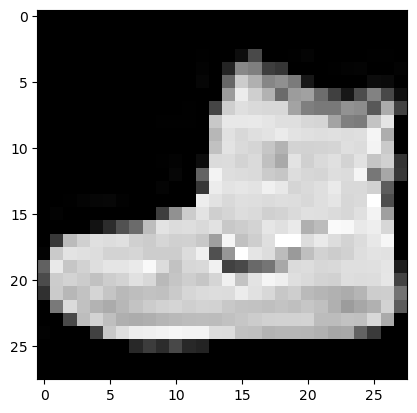

In [63]:
plt.imshow(image.squeeze(),cmap="gray")

In [64]:
# pass image through model
model_2.eval()
with torch.inference_mode():
    try:
        print(model_2(image.to(device)))
    except:
        print("dim error")
        pass

dim error


In [65]:
# pass image through model
model_2.eval()
with torch.inference_mode():
    try:
        print(model_2(torch.randn(size=(1,28,28)).to(device)))
    except:
        print("dim error")
        pass

dim error


In [66]:
# why error ????????

## But Conv layer expects input of shape:
# `(𝑁,𝐶,𝐻,𝑊)`
### Where:
* N → batch size

* C → number of input channels

* H, W → height and width

In [67]:
# pass image through model
model_2.eval()
with torch.inference_mode():
    print(model_2(torch.randn(size=(1,1,28,28)).to(device)))

tensor([[ 0.0358, -0.0907,  0.0761, -0.0497,  0.0093,  0.0326,  0.0156, -0.0088,
         -0.0064, -0.0145]], device='cuda:0')


In [68]:
# pass image through model
model_2.eval()
with torch.inference_mode():
    print(model_2(image.unsqueeze(dim=0).to(device)))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0')


### set loss funtion and optimizer

In [69]:
# set loss and opptimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [70]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### time to train and test

In [71]:
time2=train_and_test(model=model_2,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              epochs=3,
              accuracy_fn=accuracy_fn,
              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.5901, Train acc: 85.9724 | test loss: 0.3926, test acc: 85.9724
Epoch: 1
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.3627, Train acc: 87.0308 | test loss: 0.3497, test acc: 87.0308
Epoch: 2
----------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.3239, Train acc: 88.3786 | test loss: 0.3217, test acc: 88.3786
train time on Parameter containing:
tensor([[[[ 0.3060,  0.2973, -0.3563],
          [ 0.2050,  0.1293, -0.0475],
          [-0.3182,  0.1670,  0.3380]]],


        [[[-0.3150,  0.3552, -0.1232],
          [ 0.3329,  0.4173,  0.0560],
          [-0.0

In [72]:
time2

49.78249610000057

In [73]:
# get models results
model_2_results=eval_model(model=model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          device=device,
                          accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32170382142066956,
 'model_acc': 88.37859424920129}

# compare model result and training time

In [74]:
import pandas as pd

In [75]:
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321704,88.378594


In [76]:
compare_results["training_time"]=[time0,
                                 time1,
                                 time2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,39.934779
1,FashionMNISTModelV1,0.685001,75.019968,57.096640
2,FashionMNISTModelV2,0.321704,88.378594,49.782496


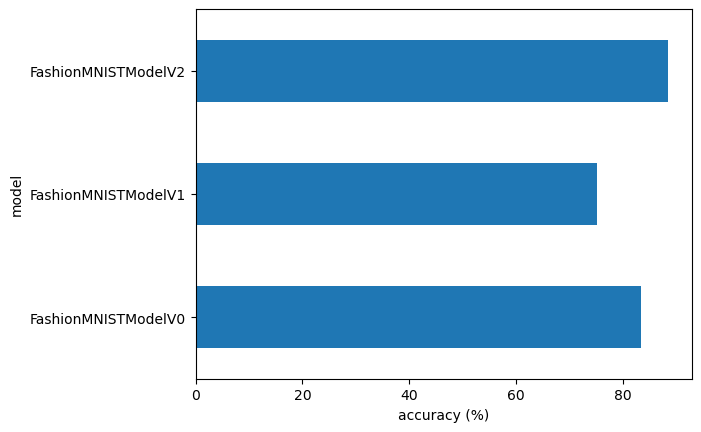

In [77]:
#Visualize our model results
compare_results.set_index("model_name") ["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [78]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [79]:
test_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [80]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [81]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [82]:
import random
#random.seed(42)
test_samples = []
test_labels = []  
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

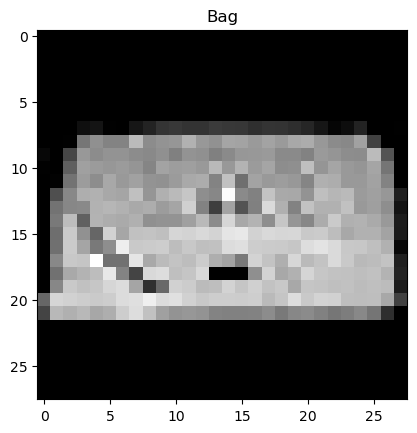

In [83]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [84]:
# make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[4.4445e-04, 2.8159e-05, 1.5044e-04, 5.4616e-06, 1.3463e-04, 4.2038e-04,
         7.6211e-04, 7.5939e-04, 9.9715e-01, 1.4791e-04],
        [2.9899e-01, 3.7393e-03, 9.1623e-03, 5.5128e-02, 1.2638e-01, 5.3773e-05,
         4.7244e-01, 1.4475e-04, 3.3849e-02, 1.0985e-04]])

In [85]:
# convert prediction probablites to lbales
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([8, 6, 4, 2, 3, 0, 8, 5, 4])

In [86]:
test_labels

[8, 0, 4, 2, 3, 0, 8, 5, 4]

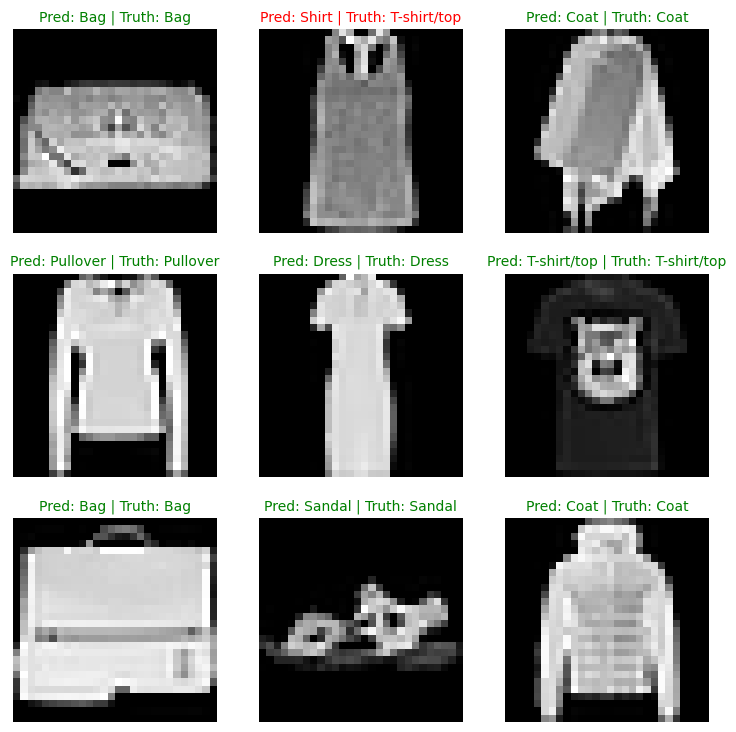

In [87]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")  # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

In [88]:
# make pridections 
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        #Send the data and targets to target device
        X, y= X.to(device), y.to(device)
        #Do the forward pass
        y_logit=model_2(X)
        #Turn predictions from logits prediction probabilities prediction labels
        y_pred=torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
#Concatenate list of predictions into a tensor
print(y_preds)
y_pred_tensor =torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 3, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 4, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 4, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([5, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 6,
        7, 8, 8, 4, 4, 7, 1, 2]), tensor([3, 2, 3, 2, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 6, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 4, 8, 6, 4,
        2, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 2,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [89]:
len(y_pred_tensor)

10000

In [90]:
#!pip install mlxtend

In [91]:
#!pip install torchmetrics

In [93]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [94]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [96]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

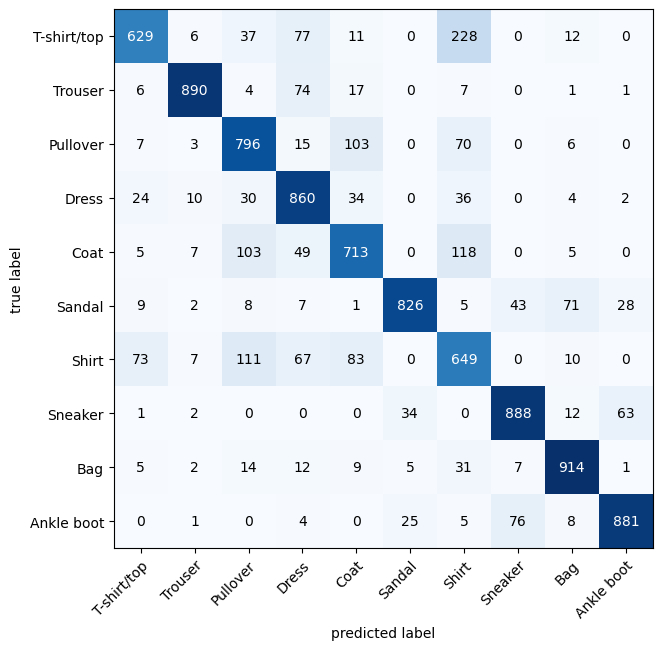

In [100]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))

### save and load best performing model

In [101]:
 torch.save(model_2.state_dict(), "model_2CNN.pth")

In [106]:
loaded_model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load("model_2CNN.pth"))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [107]:
# get models results
loaded_model_2_results=eval_model(model=loaded_model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          device=device,
                          accuracy_fn=accuracy_fn)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32170382142066956,
 'model_acc': 88.37859424920129}

In [108]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32170382142066956,
 'model_acc': 88.37859424920129}

In [112]:
#Check if model results are close to each other
torch.isclose(torch.tensor (model_2_results["model_loss"]),
torch.tensor(loaded_model_2_results["model_loss"]),
atol=1e-08)

tensor(True)